# Exploratory Training Data Analysis
- Identifying features > 25% missing to remove including Metal effect size


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
from pdpbox import get_dataset, info_plots, pdp

%matplotlib inline
%config InlineBackend.figure_format ='retina'

pio.renderers.default = "notebook"
import plotly.figure_factory as ff
import plotly.offline as py

py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import missingno as msno
import numpy
import plotly.graph_objs as go
import plotly.tools as tls
import scipy.cluster.hierarchy as hcluster
import scipy.cluster.hierarchy as shc
import sys
import sklearn.neighbors._base  
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from plotnine import *
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("ggplot")
import seaborn as sns
from matplotlib import pyplot
from pdpbox import get_dataset, info_plots, pdp
from sklearn.ensemble import (
    BaggingRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    StackingRegressor,
    VotingRegressor,
)
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")
sns.mpl.rcParams["figure.figsize"] = (15.0, 9.0)

import re

from scipy.cluster.hierarchy import dendrogram, linkage

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

import gc
import warnings

warnings.filterwarnings("ignore")

import xgboost
from sklearn.model_selection import train_test_split

seed = 0

In [2]:
dataset = pd.read_csv("lipids_total_training_TPM_metalmedian.txt", sep="\t")
dataset.shape

(804, 89)

In [3]:
data = dataset.drop(["Gene"], 1)
print(data.shape)

(804, 88)


In [4]:
data["label_encoded"] = data["label"].map(
    {"most likely": 1, "probable": 0.75, "least likely": 0.1}
)
Y = data["label_encoded"]

In [5]:
data.describe()

Metal_Median  logpval_gwascatalog  Adipose - Subcutaneous_GTExTPM  \
count    455.000000           348.000000                      769.000000   
mean       0.006659            94.704526                       61.557539   
std        0.018320           332.001403                      311.759437   
min       -0.027650             5.045757                        0.000000   
25%        0.001400            10.654947                        0.633940   
50%        0.001800            19.000000                       10.816300   
75%        0.003575            46.653598                       34.468400   
max        0.192600          4740.000000                     6228.940000   

       Adipose - Visceral (Omentum)_GTExTPM  Adrenal Gland_GTExTPM  \
count                            769.000000             769.000000   
mean                              57.732066              49.391244   
std                              313.959898             306.057097   
min                                0.000000               0.000000   
25%                                0.660482               0.487330   
50%                                9.774530               6.545060   
75%                               32.365500              26.298900   
max                             7083.900000            6921.500000   

       Artery - Aorta_GTExTPM  Artery - Coronary_GTExTPM  \
count              769.000000                 769.000000   
mean                51.176154                  48.796105   
std                357.878109                 324.213826   
min                  0.000000                   0.000000   
25%                  0.525739                   0.713522   
50%                  8.671240                   9.819890   
75%                 32.996800                  32.031400   
max               9154.210000                8361.530000   

       Artery - Tibial_GTExTPM  Bladder_GTExTPM  Brain - Amygdala_GTExTPM  \
count               769.000000       769.000000                769.000000   
mean                 52.364528        39.722270                 16.600522   
std                 434.725514       249.702997                 63.962427   
min                   0.000000         0.000000                  0.000000   
25%                   0.342379         0.751010                  0.333644   
50%                   8.956420         9.890300                  4.203220   
75%                  30.304200        31.470600                 13.373300   
max               11595.800000      6552.090000               1154.310000   

       ...    EMS_Max  ExAc_constraint_obs_exp  SignalValue_H3k27me3_median  \
count  ...  55.000000               136.000000                   471.000000   
mean   ...   3.772589                 0.698775                     4.874358   
std    ...   3.152093                 0.373192                     3.116790   
min    ...   0.000350                 0.000000                     1.537900   
25%    ...   0.040732                 0.431565                     2.505385   
50%    ...   3.842600                 0.695897                     3.785750   
75%    ...   5.283600                 0.954148                     6.147050   
max    ...   9.245800                 1.929278                    19.388200   

       SignalValue_H3k36me3_median  SignalValue_H3k79me2_median  \
count                   528.000000                   476.000000   
mean                      4.181177                     6.778497   
std                       2.511033                     4.041047   
min                       1.388760                     1.161100   
25%                       2.499278                     4.255517   
50%                       3.336317                     5.712725   
75%                       4.962893                     8.222252   
max                      14.860100                    30.470900   

       SignalValue_H3k9ac_median  SignalValue_H3k9me1_median  H4k20me1_count  \
count                 595.000000                  563.000000

### Plotting Data Missingness:

<AxesSubplot:>

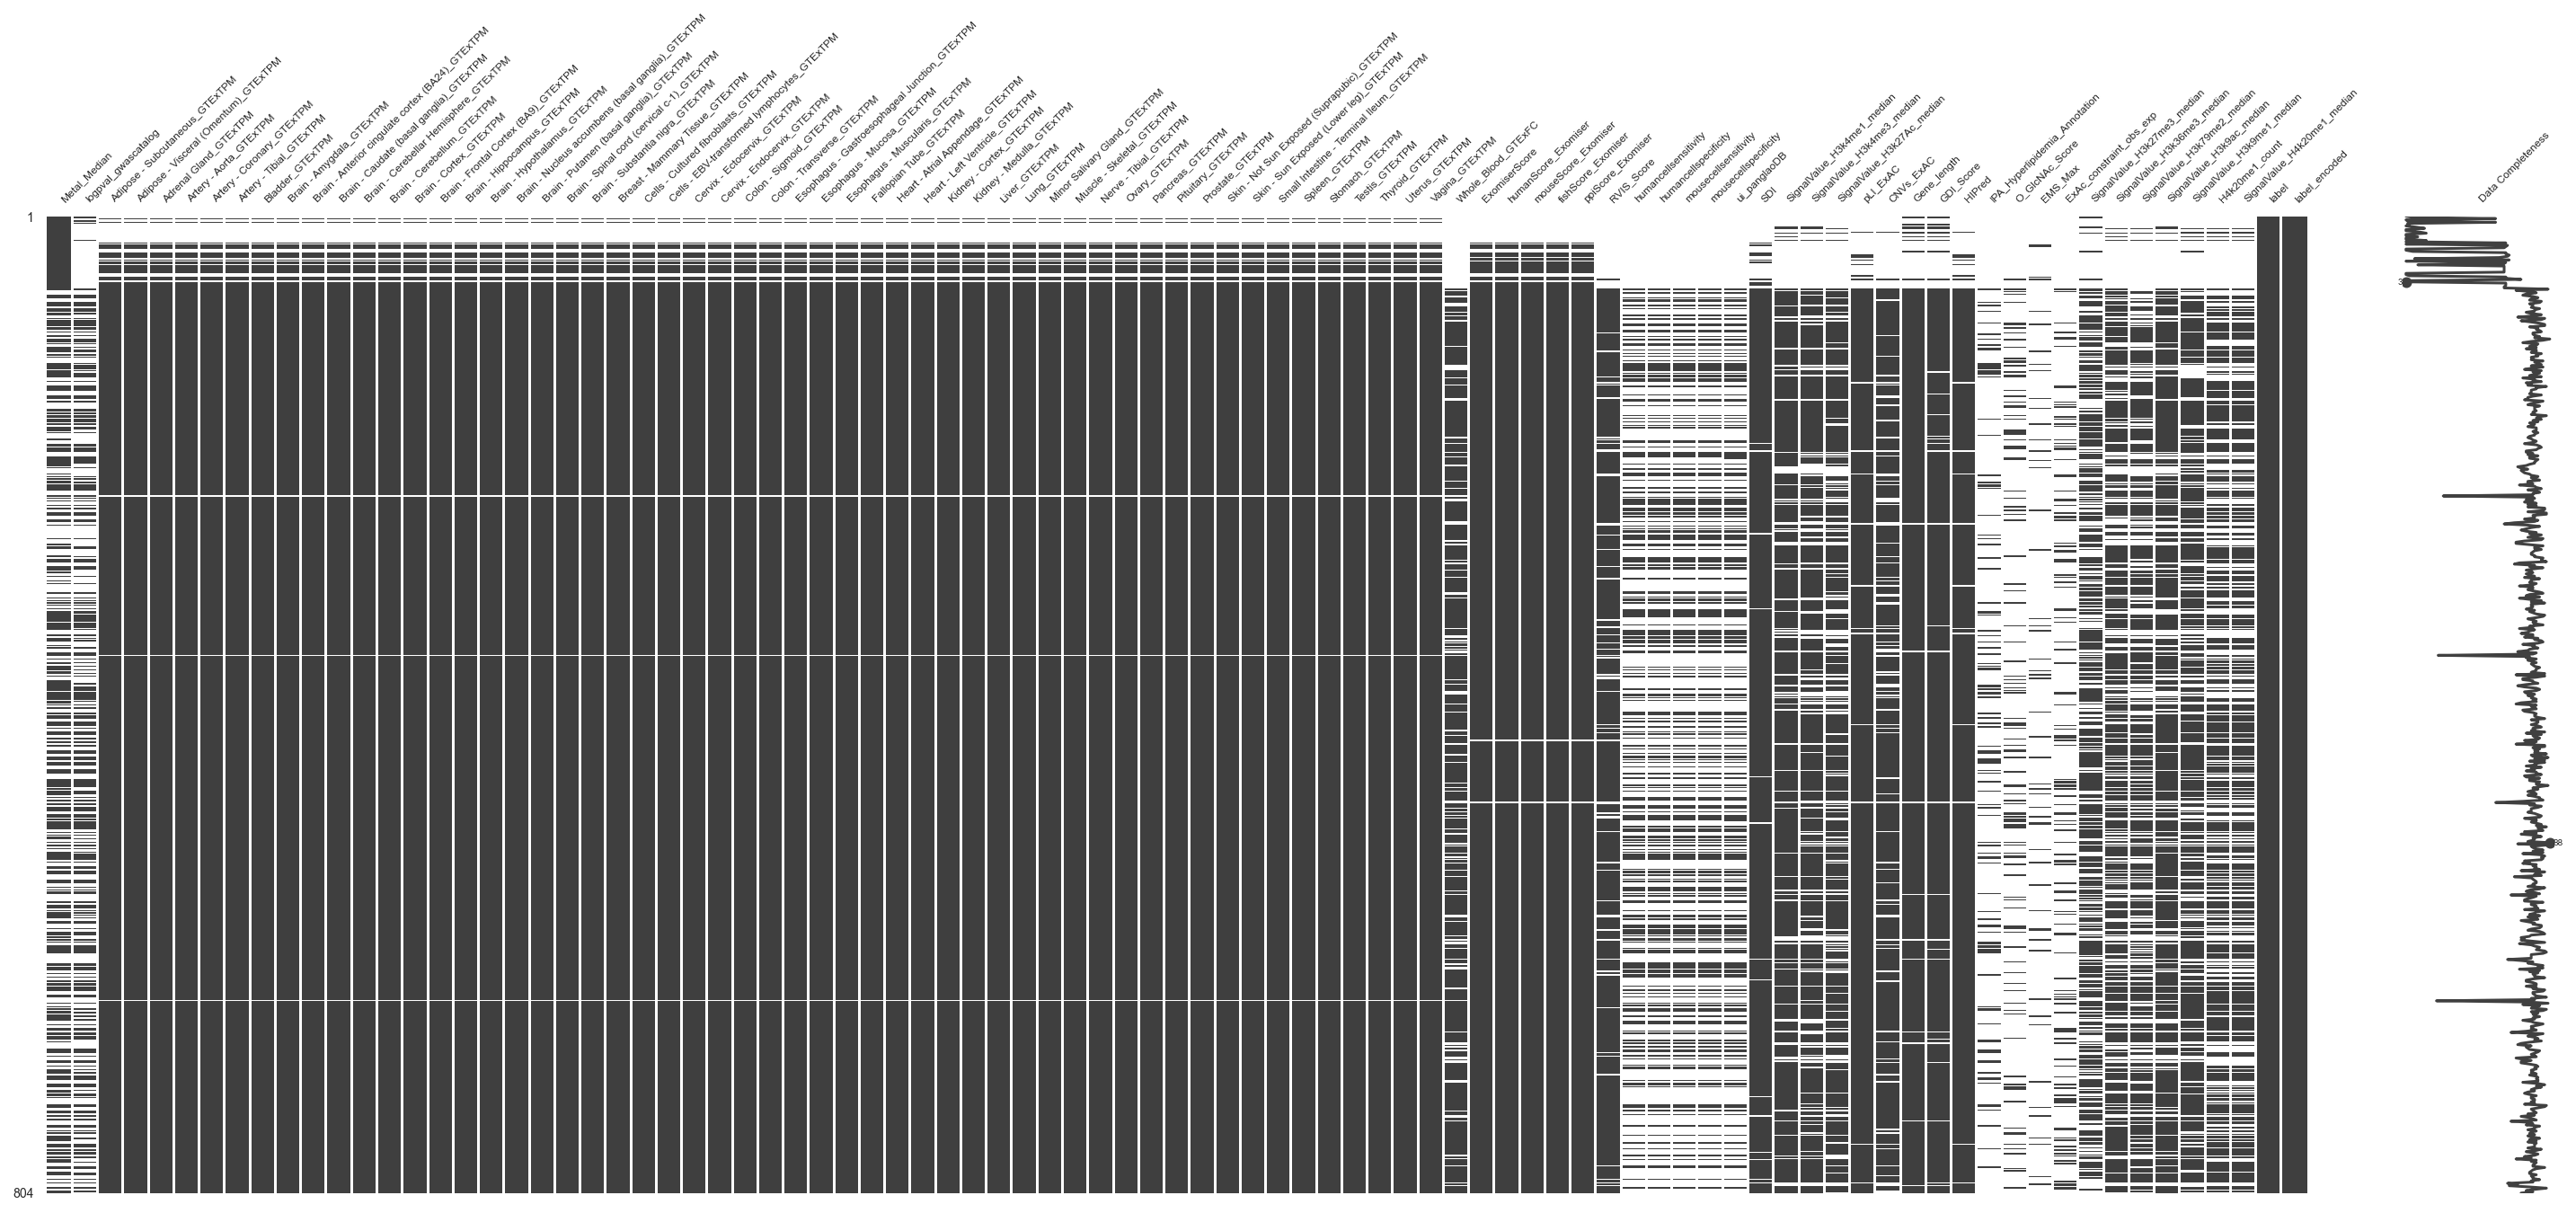

In [6]:
msno.matrix(data, labels=True, fontsize=6)

In [7]:
plt.rcParams["legend.title_fontsize"] = "large"
fig = msno.heatmap(data, figsize=(75, 75))
fig_copy = fig.get_figure()
fig_copy.savefig("missing_corr.png", format="png", dpi=300, bbox_inches="tight")

In [8]:
data.isnull().sum()

Metal_Median                            349
logpval_gwascatalog                     456
Adipose - Subcutaneous_GTExTPM           35
Adipose - Visceral (Omentum)_GTExTPM     35
Adrenal Gland_GTExTPM                    35
                                       ... 
SignalValue_H3k9me1_median              241
H4k20me1_count                          333
SignalValue_H4k20me1_median             333
label                                     0
label_encoded                             0
Length: 89, dtype: int64

In [9]:
natest = data.isnull().sum()
natest.sort_values(inplace=True)

In [10]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame(
    {"column_name": data.columns, "percent_missing": percent_missing}
)
missing_value_df.sort_values("percent_missing", inplace=True)

In [11]:
natest = natest.to_frame()
missingdata = natest.join(missing_value_df)

<BarContainer object of 87 artists>

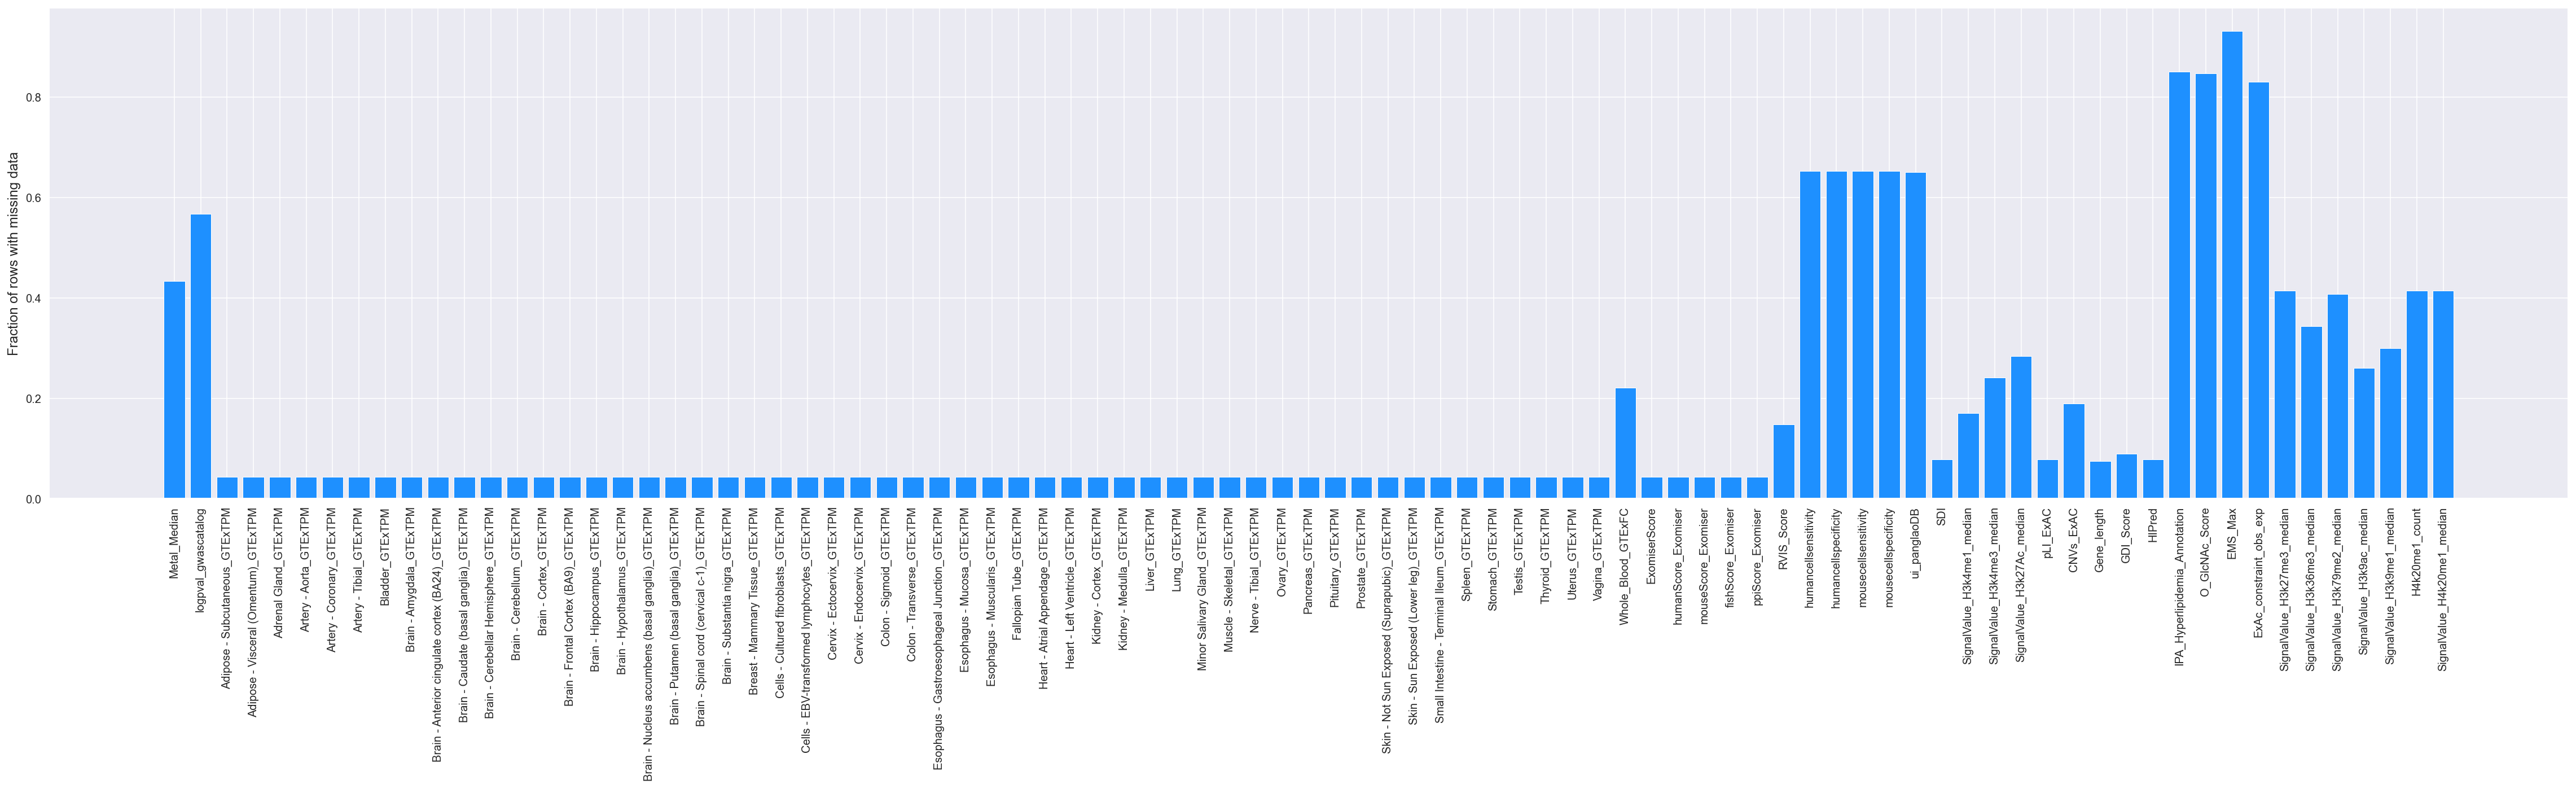

In [12]:
data_drop = data.drop(["label", "label_encoded",], 1)

null_counts = data_drop.isnull().sum() / len(data_drop)
plt.figure(figsize=(40, 8))
plt.xticks(np.arange(len(null_counts)) + 0.0, null_counts.index, rotation="vertical")
plt.ylabel("Fraction of rows with missing data")
plt.bar(np.arange(len(null_counts)), null_counts, color="dodgerblue")
#plt.savefig("training_missingness.png", format="png", dpi=300, bbox_inches="tight")

In [13]:
selection = missing_value_df[missing_value_df["percent_missing"] < 25.00]
list(selection["column_name"])

['label_encoded',
 'label',
 'Heart - Atrial Appendage_GTExTPM',
 'Heart - Left Ventricle_GTExTPM',
 'Kidney - Cortex_GTExTPM',
 'Kidney - Medulla_GTExTPM',
 'Liver_GTExTPM',
 'Lung_GTExTPM',
 'Minor Salivary Gland_GTExTPM',
 'Muscle - Skeletal_GTExTPM',
 'Nerve - Tibial_GTExTPM',
 'Ovary_GTExTPM',
 'Pancreas_GTExTPM',
 'Prostate_GTExTPM',
 'Skin - Not Sun Exposed (Suprapubic)_GTExTPM',
 'Skin - Sun Exposed (Lower leg)_GTExTPM',
 'Small Intestine - Terminal Ileum_GTExTPM',
 'Spleen_GTExTPM',
 'Stomach_GTExTPM',
 'Testis_GTExTPM',
 'Thyroid_GTExTPM',
 'Uterus_GTExTPM',
 'Vagina_GTExTPM',
 'ExomiserScore',
 'humanScore_Exomiser',
 'mouseScore_Exomiser',
 'fishScore_Exomiser',
 'ppiScore_Exomiser',
 'Fallopian Tube_GTExTPM',
 'Esophagus - Muscularis_GTExTPM',
 'Pituitary_GTExTPM',
 'Esophagus - Gastroesophageal Junction_GTExTPM',
 'Esophagus - Mucosa_GTExTPM',
 'Adipose - Visceral (Omentum)_GTExTPM',
 'Adrenal Gland_GTExTPM',
 'Artery - Aorta_GTExTPM',
 'Artery - Coronary_GTExTPM',
 'Arte